## Big Mart sales Prediction using Machine Learning : Gauranga Kumar Bhuyan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from scipy.stats import mode

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Importing Datasets

In [3]:
df = pd.read_csv("Train-Set.csv")
d2 = pd.read_csv("Test-Set.csv")

In [4]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [8]:
df["Weight"].fillna(df["Weight"].mean(),inplace = True)

In [9]:
df.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [10]:
mode_of_outlet_size = df.pivot_table(values = 'OutletSize', index = 'OutletType',aggfunc=(lambda x : mode(x.dropna()).mode[0]))

In [11]:
print(mode_of_outlet_size)

                  OutletSize
OutletType                  
Grocery Store          Small
Supermarket Type1      Small
Supermarket Type2     Medium
Supermarket Type3     Medium


#### Dealing with the null values of OutletSize

In [12]:
df.loc[df["OutletSize"].isnull(), 'OutletSize'] = df.loc[df["OutletSize"].isnull(), 'OutletType'].apply(lambda x: mode_of_outlet_size.loc[x])
df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [13]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Cheacking Correlation

In [14]:
df.corr()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
ProductVisibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
EstablishmentYear,-0.008301,-0.074834,0.005020,1.000000,-0.049135
OutletSales,0.011550,-0.128625,0.567574,-0.049135,1.000000


[]

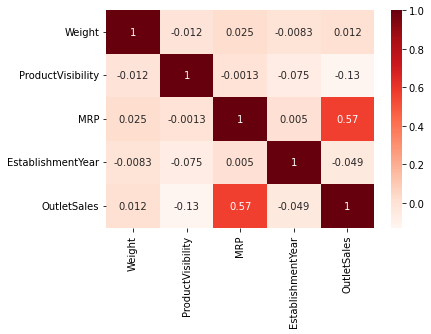

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="Reds")
plt.plot()

In [16]:
sns.set()

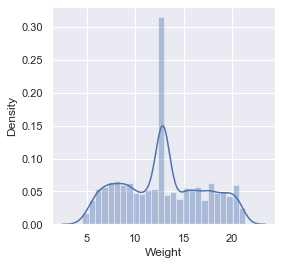

In [17]:
plt.figure(figsize = (4,4))
sns.distplot(df['Weight'])
plt.show()

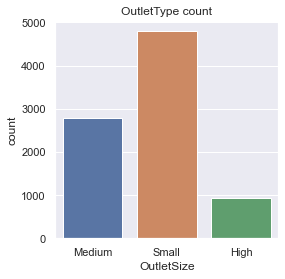

In [18]:
plt.figure(figsize = (4,4))
sns.countplot(x ='OutletSize',data = df)
plt.title('OutletType count')
plt.show()

In [19]:
df['FatContent'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

In [20]:
df.replace({'FatContent': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df['FatContent'].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

In [21]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Converting Categorical columns into numerical for Machine Learning predictions.

In [22]:
encoder = LabelEncoder()

In [23]:
df['FatContent'] = encoder.fit_transform(df['FatContent'])
df['ProductType'] = encoder.fit_transform(df['ProductType'])
df['OutletSize'] = encoder.fit_transform(df['OutletSize'])
df['LocationType'] = encoder.fit_transform(df['LocationType'])
df['OutletType'] = encoder.fit_transform(df['OutletType'])
df['OutletID'] = encoder.fit_transform(df['OutletID'])
df['ProductID'] = encoder.fit_transform(df['ProductID'])

In [24]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#### Dividing my Table into two:

In [25]:
x = df.drop(columns = 'OutletSales',axis = 1)
y = df["OutletSales"]

In [26]:
x

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [27]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64

### Training The dataset 

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=True)
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (5966, 11) (2557, 11)


In [29]:
model = XGBRegressor(n_estimators = 850,learning_rate = 0.1)  # This code snippet creates an instance of the XGBRegressor class with 850 trees and a learning rate of 0.1. The resulting model can be trained on a dataset and used to make predictions on new data.

In [30]:
model.fit(x_train,y_train) # traning 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=850, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
train_data_prediction = model.predict(x_train) # Predicting on x_train

In [32]:
r2_train = metrics.r2_score(y_train,train_data_prediction)
print("R Squared Value : ",r2_train) 

R Squared Value :  0.9624387004257524


### Decent R2 value

In [33]:
test_data_prediction = model.predict(x_test)

In [34]:
r2_test = metrics.r2_score(y_test,test_data_prediction)
print("R Squared Value : ",r2_test)

R Squared Value :  0.50673436958598


### Prediction on new dataset D2

In [35]:
d2.shape

(5681, 11)

In [36]:
d2.isnull().sum()

ProductID               0
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [37]:
d2["Weight"].fillna(d2["Weight"].mean(),inplace=True)
d2.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [38]:
mode_of_test_outlet_size = d2.pivot_table(values = 'OutletSize', index = 'OutletType',aggfunc=(lambda x : mode(x.dropna()).mode[0]))
print(mode_of_test_outlet_size)

                  OutletSize
OutletType                  
Grocery Store          Small
Supermarket Type1      Small
Supermarket Type2     Medium
Supermarket Type3     Medium


In [39]:
d2.loc[d2["OutletSize"].isnull(), 'OutletSize'] = d2.loc[d2["OutletSize"].isnull(), 'OutletType'].apply(lambda x: mode_of_test_outlet_size.loc[x])
d2.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

In [40]:
d2.replace({'FatContent': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
d2['FatContent'].value_counts()

Low Fat    3668
Regular    2013
Name: FatContent, dtype: int64

In [41]:
encoder = LabelEncoder()
d2['FatContent'] = encoder.fit_transform(d2['FatContent'])
d2['ProductType'] = encoder.fit_transform(d2['ProductType'])
d2['OutletSize'] = encoder.fit_transform(d2['OutletSize'])
d2['LocationType'] = encoder.fit_transform(d2['LocationType'])
d2['OutletType'] = encoder.fit_transform(d2['OutletType'])
d2['OutletID'] = encoder.fit_transform(d2['OutletID'])
d2['ProductID'] = encoder.fit_transform(d2['ProductID'])

In [42]:
d2.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [43]:
model.fit(x,y)
test_predictions = model.predict(d2)
print(test_predictions)          # Prediction on new dataset

[ 963.0881 1140.7249  452.7596 ... 1797.4572 4226.289  1624.2363]


In [44]:
OutletSales = test_predictions
df = pd.DataFrame(OutletSales, columns = ['OutletSales'])

d2['OutletSales'] = OutletSales
d2.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,963.088074
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1,1140.724854
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0,452.759613
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1,2995.161133
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3,6750.338379


In [86]:
x = d2.drop(columns = 'OutletSales',axis = 1)
y = d2["OutletSales"]

In [45]:
d2.to_csv("d2.csv")